In [130]:
# importing necessary libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# 
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# mounting drive path to read data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
# reading the json file into pandas
data =  pd.read_json('/content/drive/My Drive/assignment2data.json')
data.head()

,sacc_items,work_orders,female_items,is_newsletter_subscriber,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,cc_payments,curvy_items,paypal_payments,macc_items,cancels,revenue,returns,other_collection_orders,parcelpoint_orders,customer_id,android_orders,days_since_last_order,vouchers,average_discount_used,shipping_addresses,redpen_discount_used,mftw_items,days_since_first_order,unisex_items,home_orders,coupon_discount_applied,desktop_orders,ios_orders,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer
0,0,0,46,N,2,0,0,7,2,17,1,0,0,1,0,6946.34,1,16,0,64f7d7dd7a59bba7168cc9c960a5c60e,0,15672,3,3584.4818,4,4554.39,0,2091,2,1,248.65,17,0,0,4,1,50,0,1,0,35,0,0.3364
1,0,0,24,Y,0,0,12,2,0,13,0,0,1,4,0,5329.28,5,4,0,fa7c64efd5c037ff2abcce571f9c1712,0,528,0,1404.0966,4,629.03,0,2082,2,9,0.00,1,0,0,3,4,26,0,2,0,16,0,0.1404
2,0,0,147,Y,3,1,10,33,2,71,1,0,0,17,2,14133.87,2,60,0,18923c9361f27583d2320951435e4888,0,144,3,1899.7270,6,6269.71,0,2072,2,11,107.92,61,0,0,3,17,152,0,2,1,96,0,0.1851
3,0,0,0,Y,0,0,0,0,1,2,1,0,0,0,0,143.64,0,2,0,aa21f31def4edbdcead818afcdfc4d32,0,49200,1,3875.6715,1,0.00,0,2054,2,0,90.90,2,0,0,0,0,2,0,1,0,1,0,0.0000
4,0,0,1,Y,0,0,0,1,0,1,1,0,0,0,0,0.00,0,1,0,668c6aac52ff54d4828ad379cdb38e7d,0,49272,0,0.0000,1,0.00,0,2053,0,0,0.00,1,0,0,0,0,1,0,1,0,0,0,0.0000


In [132]:
original = data.shape # shape of original data frame with duplicate rows
data.drop_duplicates(keep='first', inplace=True) # identifing & dropping duplicate rows
after_dropping_duplicates = data.shape # shape of data frame after deleting duplicate rows
df = data.copy()

print('Original Shape:',original)
print('Shape after dropping Duplicates:',after_dropping_duplicates)
print('Number of Duplicate Rows:',original[0]-after_dropping_duplicates[0]) # number of duplicate rows found by subtracting number of nows in new data frame from the original data frame

Original Shape: (46279, 43)
Shape after dropping Duplicates: (46030, 43)
Number of Duplicate Rows: 249


In [ ]:
def missing_df(df): # defining function to identify missing values
    missing_val = df.isnull().sum().to_frame('missing_val') # identifying missing values & calculating their frequency in each column
    missing_val['%']=(missing_val['missing_val']/df.shape[0])*100 #calculating the percentage of missing values in each column by diving missing values (per column)/ number of rows
    missing_val.drop(['missing_val'],axis=1,inplace=True)
    print(missing_val)
    return missing_val

missing_val=missing_df(df) # calling missing_df function

In [134]:
def column_list(df): # define function to seperate numerical & categorical features
  num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # listing out all possible numerical datatypes
  numerical_columns = list(df.select_dtypes(include=num_colums).columns) # selecting only features/columns that fall under the listed data types (numerical)
  numerical_columns = df[numerical_columns].columns
  categorical_columns = set(df.columns)-set(numerical_columns) # the remaining columns (i.e. not numerical) are categorical in nature
  return numerical_columns,categorical_columns

numerical_columns,categorical_columns = column_list(df) # calling te column_list function
print('Numerical Columns are :',numerical_columns)
print('Categorical Columns are :',categorical_columns)

print('Statistical summary of numerical columns:') 
df[numerical_columns].describe() # statistical summary of numerical columns using describe function

Numerical Columns are : Index(['sacc_items', 'work_orders', 'female_items', 'male_items',
       'afterpay_payments', 'msite_orders', 'wftw_items', 'mapp_items',
       'orders', 'cc_payments', 'curvy_items', 'paypal_payments', 'macc_items',
       'cancels', 'revenue', 'returns', 'other_collection_orders',
       'parcelpoint_orders', 'android_orders', 'days_since_last_order',
       'vouchers', 'average_discount_used', 'shipping_addresses',
       'redpen_discount_used', 'mftw_items', 'days_since_first_order',
       'unisex_items', 'home_orders', 'coupon_discount_applied',
       'desktop_orders', 'ios_orders', 'apple_payments', 'wspt_items',
       'wacc_items', 'items', 'mspt_items', 'devices', 'different_addresses',
       'wapp_items', 'other_device_orders', 'average_discount_onoffer'],
      dtype='object')
Categorical Columns are : {'customer_id', 'is_newsletter_subscriber'}
Statistical summary of numerical columns:


,sacc_items,work_orders,female_items,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,cc_payments,curvy_items,paypal_payments,macc_items,cancels,revenue,returns,other_collection_orders,parcelpoint_orders,android_orders,days_since_last_order,vouchers,average_discount_used,shipping_addresses,redpen_discount_used,mftw_items,days_since_first_order,unisex_items,home_orders,coupon_discount_applied,desktop_orders,ios_orders,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer
count,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,35826.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000
mean,0.087899,0.240995,6.472800,1.720660,0.053595,0.978557,1.633826,0.926613,4.111362,0.642972,0.041321,0.490376,0.573908,0.053096,1305.479232,1.626113,2.308386,0.025418,0.043167,24535.400217,0.941821,2357.118087,1.501065,435.567699,0.421290,1371.811601,0.390289,1.536563,175.173407,2.626548,0.463046,0.000565,0.378753,0.573908,8.583750,0.116229,1.277580,0.116402,3.800782,0.000043,0.190171
std,0.539604,1.565071,17.830007,5.468827,0.225220,2.859161,4.088452,3.689578,8.122569,0.479128,0.782744,0.499913,2.542536,2.175601,5611.107402,7.019715,5.192695,0.452441,0.537200,16934.525487,2.416748,2032.366465,1.098996,1851.597072,1.444193,605.777029,1.230090,4.447233,841.277098,6.105990,2.484472,0.023760,1.712662,2.542536,19.959377,0.716745,0.533286,0.320710,12.679782,0.009322,0.190702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.360000,0.000000,1.000000,0.000000,0.000000,6768.000000,0.000000,80.974900,1.000000,0.000000,0.000000,904.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,213.015000,0.000000,1.000000,0.000000,0.000000,25416.000000,0.000000,2122.822500,1.000000,54.480000,0.000000,1713.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.150000
75%,0.000000,0.000000,5.000000,1.000000,0.000000,1.000000,2.000000,0.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,791.870000,1.000000,2.000000,0.000000,0.000000,41640.000000,1.000000,3829.608450,2.000000,253.677500,0.000000,1786.000000,0.000000,1.000000,62.640000,3.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.314300
max,29.000000,84.000000,537.000000,273.000000,1.000000,172.000000,261.000000,151.000000,665.000000,1.000000,116.000000,1.000000,353.000000,460.000000,354700.160000,343.000000,665.000000,32.000000,33.000000,51840.000000,57.000000,10000.000000,15.000000,102653.770000,78.000000,2164.000000,83.000000,175.000000,33332.260000,665.000000,84.000000,1.000000,56.000000,353.000000,701.000000,38.000000,3.000000,1.000000,409.000000,2.000000,1.000000


,days_since_first_order,days_since_last_order,redpen_discount_used,coupon_discount_applied
count,46030.000000,46030.000000,46030.000000,35826.000000
mean,1371.811601,24535.400217,435.567699,175.173407
std,605.777029,16934.525487,1851.597072,841.277098
min,1.000000,24.000000,0.000000,0.000000
25%,904.250000,6768.000000,0.000000,0.000000
50%,1713.000000,25416.000000,54.480000,0.000000
75%,1786.000000,41640.000000,253.677500,62.640000
max,2164.000000,51840.000000,102653.770000,33332.260000


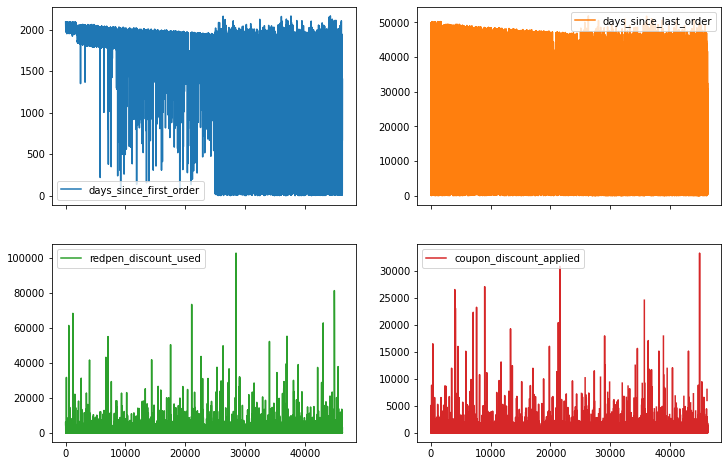

In [136]:
error = df[['days_since_first_order', 'days_since_last_order','redpen_discount_used','coupon_discount_applied']]
# The following 4 columns require a deeper look to check if they are corrupted.
# ('days_since_first_order', 'days_since_last_order') - logic dictates days since first  order be lhigher than days since last order, but this is false 80-90% rows. Indicating incorrect data.
# ('redpen_discount_used','coupon_discount_applied') - these 2 columns are missing from assignment2data.pdf, additionally the latter contains 20-25% missing values

error.plot(subplots=True, layout=(2, 2), figsize=(12, 8))
error.describe()

# Based on our analysis the ('days_since_first_order', 'days_since_last_order') columns are corrupted as there appears to be a mix-up in the values of these 2 columns.
# Simply switching the 2 column names is not effective as we will still have 10-20% incorrect values.
# So we will loop throught the rows and save the higher of the 2 values under 'days_since_first_order' & the lower under 'days_since_last_order'. (continued in next cell)

,days_since_first_order,days_since_last_order,active_duration
count,46030.000000,46030.000000,46030.000000
mean,24584.045666,1323.166153,23260.879513
std,16866.888540,628.332785,16408.343574
min,24.000000,1.000000,0.000000
25%,6768.000000,784.000000,5796.000000
50%,25416.000000,1701.000000,24071.500000
75%,41640.000000,1776.000000,39882.000000
max,51840.000000,2164.000000,49680.000000


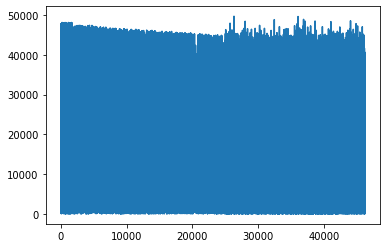

In [129]:
for customer in df['customer_id']: # looping through the customer_ids
    filtered_df = df[(df['customer_id']==customer)] # filtering for specific customer_id
    days_since = filtered_df[['days_since_first_order','days_since_last_order']] # extracting the value from the 2 columns
    df.loc[df['customer_id'] == customer, 'days_since_first_order'] = max(max(days_since.values.tolist())) # assigning the higher number of days to 'days_since_first_order'
    df.loc[df['customer_id'] == customer, 'days_since_last_order'] = min(min(days_since.values.tolist())) # assigning the lower number of days to 'days_since_last_order'

error = df[['days_since_first_order', 'days_since_last_order']]
error['active_duration'] = df['days_since_first_order']-df['days_since_last_order'] # checking the columns are correct after the steps taken
error['active_duration'].plot()
error.describe()

In [138]:
purchased_female_items = df[df['female_items']> 0].shape[0] # number of people who purchased female items (filtering data frame & counting number of rows)
also_credit_card = df[(df['female_items']> 0) & (df['cc_payments']> 0)].shape[0] # number of people that purchased female items that also payed using credit cards (filtering data frame & counting number of rows)
print ('Percentage of people who purchased female item that also paid by credit card are',(also_credit_card/purchased_female_items)*100) # calculating the percentage value

credit_card_payment = int(df[(df['cc_payments']> 0)]['revenue'].sum()) # total income/revenue (to nearest dollar) from people who payed using credit card (filter dataframe & sum up revenue)
print('Revenue from customers paying by Credit Card is $',credit_card_payment)

Percentage of people who purchased female item that also paid by credit card are 65.4812873161497
Revenue from customers paying by Credit Card is $ 50189328


In [139]:
print(df['is_newsletter_subscriber'].value_counts()) # original value counts for 'is_newsletter_subscriber' feature
print(df['is_newsletter_subscriber'].dtypes) # original data type for 'is_newsletter_subscriber' column
df['is_newsletter_subscriber'].replace(['Y', 'N'],[1,0],inplace=True) # replacing Y & N with 1 & 0 in 'is_newsletter_subscriber' column
print(df['is_newsletter_subscriber'].value_counts()) # value counts for 'is_newsletter_subscriber' feature after replacing Y/N with 1/0
print(df['is_newsletter_subscriber'].dtypes) # data type for 'is_newsletter_subscriber' column after replacing Y/N with 1/0

N    27203
Y    18827
Name: is_newsletter_subscriber, dtype: int64
object
0    27203
1    18827
Name: is_newsletter_subscriber, dtype: int64
int64


In [140]:
df['female_item_rate']=df['female_items']/df['items'] # creating new features
df['male_item_rate']=df['male_items']/df['items'] # creating new features
df['unisex_item_rate']=df['unisex_items']/df['items'] # creating new features

num_of_customers = df[(df['female_item_rate'] == 1) & (df['male_item_rate'] == 1 ) & (df['orders'] > 4.11 )].shape[0] # finding rows where all 3 conditions are true (and)
print('Customers that satisfy all of the above conditions:',num_of_customers) # NOTE, this is not an error, there is no overlap as per the conditions given in the question

# Looking at each of the conditions seperately (& not using logical AND as assumed from the question)
num_of_customers = df[(df['female_item_rate'] == 1)].shape[0]
print('Customers that satisfy the 1st condition:',num_of_customers) # number of customers with female_item_rate = 1

num_of_customers = df[(df['male_item_rate'] == 1)].shape[0]
print('Customers that satisfy the 2nd condition:',num_of_customers) # number of customers with male_item_rate = 1

num_of_customers = df[(df['orders'] > 4.11 )].shape[0]
print('Customers that satisfy the 3rd condition:',num_of_customers) # number of customers with orders > 4

Customers that satisfy all of the above conditions: 0
Customers that satisfy the 1st condition: 23763
Customers that satisfy the 2nd condition: 7890
Customers that satisfy the 3rd condition: 9987


In [141]:
df = data.copy()
#df['order_value'] = df['revenue']/df['orders']
subscriber = df.groupby('is_newsletter_subscriber').agg({'orders': ['mean','median','max']}) # grouping according to 'is_newsletter_subscriber' (2 groups) & calculating the
print(subscriber)                                                                            # mean, median & max of 'orders' column or each group

                            orders              
                              mean median    max
is_newsletter_subscriber                        
N                         2.484175    1.0  665.0
Y                         6.462474    3.0  234.0


In [144]:
df =  pd.read_csv('/content/drive/My Drive/customer_transaction.csv') # reading the csv file into pandas


c_id = df.groupby('customer_id') # grouping by customer_id
b_id = df.groupby('basket_id') # grouping by basket_id

df.head()

,customer_id,product_id,basket_id,loyalty,household_type,age_band,department,brand,commodity,store,transaction_date,price,days_since_first
0,22115,5565932,65459,Loyalist,1 adult with kids,19-24,Grocery,national,Breakfast snacks,374,19/01/2017 0:00,4.99,21
1,22115,1098066,65459,Loyalist,1 adult with kids,19-24,Grocery,private,Baked bread/buns/rolls,374,19/01/2017 0:00,0.88,21
2,22115,1148035,65459,Loyalist,1 adult with kids,19-24,Pharmaceutical,national,Candy,374,19/01/2017 0:00,0.50,21
3,22115,870882,65459,Loyalist,1 adult with kids,19-24,Grocery,national,Frozen meat,374,19/01/2017 0:00,4.99,21
4,22115,1121557,65459,Loyalist,1 adult with kids,19-24,Cosmetics,private,Coupon/misc items,374,19/01/2017 0:00,39.99,21


In [145]:
print('Number of transactions based on basket level:',b_id.ngroups) # number of transactions/baskets by calculating the number of unique basket_ids
print('Average basket size:',b_id.size().mean()) # average size of each basket by summing up size of all the baskets & dividing by the total number of baskets
print('Most popular product commodity:',df['commodity'].value_counts().nlargest(1)) # identifying the most popular product, based on its frequency (using value_counts)

Number of transactions based on basket level: 3498
Average basket size: 22.22698684962836
Most popular product commodity: Beef    2944
Name: commodity, dtype: int64


In [146]:
avg_price=pd.DataFrame()
avg_price['customer_id'] = df['customer_id'].unique() # listing out list of cutomers (unique column_ids) as one of our columns
avg_price['avg'] = '' # empty column to calculate the averag price of a basket/transaction for each customer
avg_price.set_index("customer_id", inplace = True)

for customer in avg_price.index: # looping through the customer_ids
    filtered_df = df[(df['customer_id']==customer)] # filtering data frame based on customer_id
    avgg = filtered_df['price'].sum()/filtered_df['basket_id'].nunique() # calculating average basket price (for each customer) by dividing total amount spent by customer
    avg_price.at[customer,'avg'] = avgg                                  # by the number of baskets/transactions performed by customer

avg_price.reset_index(inplace=True)
avg_price.head()

,customer_id,avg
0,22115,75.77
1,22317,105.69
2,23057,74.51
3,23876,60.62
4,24052,86.825


In [147]:
transaction_product = pd.pivot_table(df, index=['basket_id'],values='price', columns=['commodity']) # pivoting the table so that each row is the unique basket_id & the columns are the unique list of products
transaction_product.fillna(0,inplace=True) # if a basket does not conatain a product, its column value is set as 0
transaction_product[transaction_product != 0] = 1 # if a basket conatains a product, its column value is set as 1
transaction_product.reset_index(inplace=True)
transaction_product.head()

commodity,basket_id,Air care,Analgesics,Antacids,Apparel,Apples,Audio/video products,Automotive products,Baby foods,Baby hbc,Bacon,Bag snacks,Baked bread/buns/rolls,Baked sweet goods,Bakery party trays,Baking,Baking mixes,Baking needs,Bath,Bath tissues,Batteries,Beef,Beers/ales,Berries,Beverage,Bird seed,Bleach,Books,Bottle deposits,Bread,Breakfast sausage/sandwiches,Breakfast snacks,Breakfast sweets,Broccoli/cauliflower,Brooms and mops,Butter,Cakes,Candles/accessories,Candy,Canned beans,Canned juices,Canned milk,Carrots,Cat food,Cat litter,Cereal,Cereal/breakfast,Charcoal and lighter fluid,Cheese,Chicken,Chicken/poultry,Chips/snacks,Christmas seasonal,Cigarettes,Citrus,Cocoa mixes,Coffee,Coffee filters,Cold and flu,Condiments,Continuities,Cookies,Cookware,Corn,Cosmetic accessories,Coupon/misc items,Crackers/misc bkd fd,Deli meats,Deli specialties,Deli supplies,Deodorants,Diapers,Dietary aid products,Dinner mixes,Dinner sausage,Dishwash detergents,Disposible foilware,Dog foods,Domestic goods,Domestic wine,Dried fruit,Dry beans/vegetables/potato/rice,Dry mix desserts,Dry noodles/pasta,Dry sauces/gravy,Dry tea/coffee/cocoa mix,Eggs,Electrical suppplies,Eye and ear care products,Facial tissues,Family planning,Feminine hygiene,Film and camera products,Fireworks,First aid products,Fitness/diet,Floral accessories,Floral plants,Flour,Fluid milk products,Food wraps/bags,Foot care products,Fragrances,Frozen,Frozen boxed/grocery,Frozen bread/dough,Frozen breakfast foods,Frozen chicken,Frozen drinks,Frozen fruits,Frozen ice,Frozen meat,Frozen novelties,Frozen pie/desserts,Frozen pizza,Frozen potatoes,Frozen vegetables,Fruit,Glasses/vision aids,Glassware/dinnerware,Grapes,Greeting cards/party supplies,Hair care accessories,Hair care products,Halloween,Hand/body/facial products,Hardware supplies,Heat/serve,Herbs,Home freezing,Home furnishings,Hosiery/socks,Hot dogs,Household cleaning needs,Ice cream/milk/sherbets,Imported wine,In-store photofinishing,Infant care products,Infant formula,Insecticides,Ironing and chemicals,Isotonic drinks,J-hooks,Juice,Kitchen gadgets,Laundry additives,Laundry detergents,Lawn and garden shop,Laxatives,Liquor,Lunch meat,Magazine,Makeup and treatment,Margarines,Meat - Other,Melons,Milk by-products,Misc dairy,Misc wine,Miscellaneous,Mushrooms,Natural hbc,New age,Newspaper,Non edible products,Non-dairy beverages,Nuts,Olives,Onions,Oral hygiene products,Organic fruit/vegetables,Overnight photofinishing,Packaged natural snacks,Paper housewares,Paper towels,Party trays,Pasta sauce,Peanut butter/jelly/jams,Pears,Peppers,Personal care appliances,Pet care supplies,Pickles/relish,Pies,Plastic housewares,Popcorn,Pork,Portable electric appliances,Potatoes,Powder/crystal drink mix,Prepaid wireless accessories,Prepared food,Processed,Produce supplies,Refrigerated,Refrigerated dough products,Refrigerated juices/drinks,Rice cakes,Rolls,Roses,Salad,Salad dressing,Sandwiches,Seafood-fresh,Seafood-frozen,Seafood-misc,Seafood-shelf stable,Seasonal,Service beverage,Sewing,Shaving care products,Shoe care,Shortening/oil,Sinus and allergy,Smoked meats,Snack nuts,Snacks,Soap,Soft drinks,Soup,Spices,Sports memorablilia,Squash,Stationery/school supplies,Stone fruit,Sugars/sweetners,Suntan,Sushi,Syrup,Syrups/toppings,Teas,Tickets,Tobacco other,Tomatoes,Toys and games,Tropical fruit,Turkey,Valentine,Value added fruit,Value added vegetables,Vegetables - all others,Vegetables - shelf stable,Vegetables salad,Vitamins,Warehouse snacks,Water,Water - carbonated/flavoured drinks,Yogurt
0,51964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [148]:
customer_product_freq = pd.pivot_table(df, index=['customer_id'],values='price', columns=['commodity']) # pivoting the table so that each row is the unique customer_id & the columns are the unique list of products
commodity = df['commodity'].unique() # list of products (unique)
customers = df['customer_id'].unique() # list of customers (unique)
for customer in customers: # looping through the customers
    for product in commodity: # looping through the products (nested)
        filtered_df = df[(df['customer_id']==customer)] # filtering data based on customer_id
        filtered_df = filtered_df[(filtered_df['commodity']==product)] # filtering data based on specific product purchased by that customer
        frequency = filtered_df.shape[0] # number of rows gives us the frequency of this occurence
        customer_product_freq.at[customer,product] = frequency # saving the calculated frequency in data frame
customer_product_freq.reset_index(inplace=True)
customer_product_freq.head()

commodity,customer_id,Air care,Analgesics,Antacids,Apparel,Apples,Audio/video products,Automotive products,Baby foods,Baby hbc,Bacon,Bag snacks,Baked bread/buns/rolls,Baked sweet goods,Bakery party trays,Baking,Baking mixes,Baking needs,Bath,Bath tissues,Batteries,Beef,Beers/ales,Berries,Beverage,Bird seed,Bleach,Books,Bottle deposits,Bread,Breakfast sausage/sandwiches,Breakfast snacks,Breakfast sweets,Broccoli/cauliflower,Brooms and mops,Butter,Cakes,Candles/accessories,Candy,Canned beans,Canned juices,Canned milk,Carrots,Cat food,Cat litter,Cereal,Cereal/breakfast,Charcoal and lighter fluid,Cheese,Chicken,Chicken/poultry,Chips/snacks,Christmas seasonal,Cigarettes,Citrus,Cocoa mixes,Coffee,Coffee filters,Cold and flu,Condiments,Continuities,Cookies,Cookware,Corn,Cosmetic accessories,Coupon/misc items,Crackers/misc bkd fd,Deli meats,Deli specialties,Deli supplies,Deodorants,Diapers,Dietary aid products,Dinner mixes,Dinner sausage,Dishwash detergents,Disposible foilware,Dog foods,Domestic goods,Domestic wine,Dried fruit,Dry beans/vegetables/potato/rice,Dry mix desserts,Dry noodles/pasta,Dry sauces/gravy,Dry tea/coffee/cocoa mix,Eggs,Electrical suppplies,Eye and ear care products,Facial tissues,Family planning,Feminine hygiene,Film and camera products,Fireworks,First aid products,Fitness/diet,Floral accessories,Floral plants,Flour,Fluid milk products,Food wraps/bags,Foot care products,Fragrances,Frozen,Frozen boxed/grocery,Frozen bread/dough,Frozen breakfast foods,Frozen chicken,Frozen drinks,Frozen fruits,Frozen ice,Frozen meat,Frozen novelties,Frozen pie/desserts,Frozen pizza,Frozen potatoes,Frozen vegetables,Fruit,Glasses/vision aids,Glassware/dinnerware,Grapes,Greeting cards/party supplies,Hair care accessories,Hair care products,Halloween,Hand/body/facial products,Hardware supplies,Heat/serve,Herbs,Home freezing,Home furnishings,Hosiery/socks,Hot dogs,Household cleaning needs,Ice cream/milk/sherbets,Imported wine,In-store photofinishing,Infant care products,Infant formula,Insecticides,Ironing and chemicals,Isotonic drinks,J-hooks,Juice,Kitchen gadgets,Laundry additives,Laundry detergents,Lawn and garden shop,Laxatives,Liquor,Lunch meat,Magazine,Makeup and treatment,Margarines,Meat - Other,Melons,Milk by-products,Misc dairy,Misc wine,Miscellaneous,Mushrooms,Natural hbc,New age,Newspaper,Non edible products,Non-dairy beverages,Nuts,Olives,Onions,Oral hygiene products,Organic fruit/vegetables,Overnight photofinishing,Packaged natural snacks,Paper housewares,Paper towels,Party trays,Pasta sauce,Peanut butter/jelly/jams,Pears,Peppers,Personal care appliances,Pet care supplies,Pickles/relish,Pies,Plastic housewares,Popcorn,Pork,Portable electric appliances,Potatoes,Powder/crystal drink mix,Prepaid wireless accessories,Prepared food,Processed,Produce supplies,Refrigerated,Refrigerated dough products,Refrigerated juices/drinks,Rice cakes,Rolls,Roses,Salad,Salad dressing,Sandwiches,Seafood-fresh,Seafood-frozen,Seafood-misc,Seafood-shelf stable,Seasonal,Service beverage,Sewing,Shaving care products,Shoe care,Shortening/oil,Sinus and allergy,Smoked meats,Snack nuts,Snacks,Soap,Soft drinks,Soup,Spices,Sports memorablilia,Squash,Stationery/school supplies,Stone fruit,Sugars/sweetners,Suntan,Sushi,Syrup,Syrups/toppings,Teas,Tickets,Tobacco other,Tomatoes,Toys and games,Tropical fruit,Turkey,Valentine,Value added fruit,Value added vegetables,Vegetables - all others,Vegetables - shelf stable,Vegetables salad,Vitamins,Warehouse snacks,Water,Water - carbonated/flavoured drinks,Yogurt
0,15803,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.

In [149]:
from sklearn.neighbors import KNeighborsClassifier # importing necessary libraries
from sklearn.model_selection import train_test_split

y = customer_product_freq['customer_id'] # isolating the target/dependent variable
x = customer_product_freq.drop(['customer_id'], axis = 1) # isolating the features/independent variables
  
# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25) # splitting the data into train/test

knn = KNeighborsClassifier(n_neighbors=5) # calling the knn classifier and setting the number of neighbours to 5
knn.fit(x_train, y_train) # training the model on train_data
y_predicted = knn.predict(x_test) # predicting on test data using trained model

Answer 2.2

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules # importing necessry libraries

transaction_product.drop(['basket_id'], axis = 1, inplace=True)
itemset = apriori(transaction_product, min_support=0.05, use_colnames=True) # calculating & listing itemsets with support grater than 5%
itemset['length'] = itemset['itemsets'].apply(lambda x: len(x)) # calculating length of itemsets
itemset = itemset[(itemset['length'] > 1)] # only retaining itemsets with length greater than 1
itemset.reset_index(inplace=True, drop=True)
itemset.head()

,support,itemsets,length
0,0.054317,"(Apples, Bag snacks)",2
1,0.074614,"(Apples, Baked bread/buns/rolls)",2
2,0.134934,"(Beef, Apples)",2
3,0.065752,"(Apples, Bread)",2
4,0.065466,"(Apples, Breakfast sweets)",2


In [ ]:
itemset = apriori(transaction_product, min_support=0.02, use_colnames=True) # calculating & listing itemsets with support grater than 2%
itemset.reset_index(inplace=True, drop=True)

rules = association_rules(itemset, metric="lift", min_threshold=1) # association rules for above itemsets having lift more than 1
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Beef),(Analgesics),0.557461,0.066038,0.038022,0.068205,1.032821,0.001208,1.002326
1,(Analgesics),(Beef),0.066038,0.557461,0.038022,0.575758,1.032821,0.001208,1.043127
2,(Analgesics),(Bread),0.066038,0.292739,0.020011,0.303030,1.035156,0.000680,1.014766
3,(Bread),(Analgesics),0.292739,0.066038,0.020011,0.068359,1.035156,0.000680,1.002492
4,(Analgesics),(Breakfast sweets),0.066038,0.295312,0.021155,0.320346,1.084774,0.001653,1.036835
